In [32]:
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt  

In [33]:
#load dataset
df_original= pd.read_csv('classification_2.csv', names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

In [34]:
df = df_original
# show top 5 rows of dataset
df.head()


,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
# Success - Display the first record
display(df.head(n=1))

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [36]:
# check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Martial Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours per week    32561 non-null int64
Country           31978 non-null object
Target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education-Num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital Gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital Loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
Hours per week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [38]:
# Total number of records
print("Dataset has {0} records & {1} columns".format(df.shape[0], df.shape[1]))

Dataset has 32561 records & 15 columns


In [39]:
df.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')

In [40]:
df.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Target               0
dtype: int64

In [41]:
df.min()

Age                               17
fnlwgt                         12285
Education                       10th
Education-Num                      1
Martial Status              Divorced
Relationship                 Husband
Race              Amer-Indian-Eskimo
Sex                           Female
Capital Gain                       0
Capital Loss                       0
Hours per week                     1
Target                         <=50K
dtype: object

In [42]:
# Total number of records
n_records = df.shape[0]
# Number of records where individual's income is more than $50,000
n_greater_50k = df[df['Target'] == '<=50K'].shape[0]
print("Individuals making more than $50,000: {}".format(n_greater_50k))

# Number of records where individual's income is more than $50,000
n_greater_50k = df[df['Target'] == '>50K'].shape[0]
print("Individuals making more than $50,000: {}".format(n_greater_50k))

# Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k / n_records) * 100
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Individuals making more than $50,000: 24720
Individuals making more than $50,000: 7841
Percentage of individuals making more than $50,000: 24.080955744602438%


In [45]:
print(df["Country"].value_counts() / df.shape[0]).head()

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
corr = df.corr()
sb.heatmap(corr)

In [26]:
# print (corr['Target'].sort_values(ascending=False)[:15], '\n') #top 15 values
# print ('----------------------')
# print (corr['Target'].sort_values(ascending=False)[-10:]) #last 5 values`

In [27]:
# str(df)
# df = pd.get_dummies(df)
# df.head()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,...,Country_Scotland,Country_South,Country_Taiwan,Country_Thailand,Country_Trinadad&Tobago,Country_United-States,Country_Vietnam,Country_Yugoslavia,Target_<=50K,Target_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


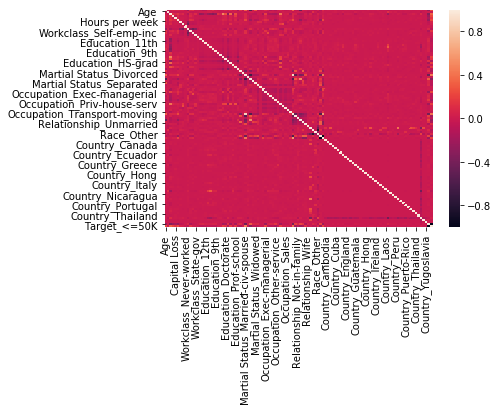

In [28]:
# corr = df.corr()
# sb.heatmap(corr)

In [29]:
# df.corr()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,...,Country_Scotland,Country_South,Country_Taiwan,Country_Thailand,Country_Trinadad&Tobago,Country_United-States,Country_Vietnam,Country_Yugoslavia,Target_<=50K,Target_>50K
Age,1.000000,-0.076646,0.036527,0.077674,5.777454e-02,0.068756,0.051227,0.060901,-0.019362,-0.198388,...,0.002583,0.000613,-0.013816,-0.006271,0.004843,0.015917,-1.505357e-02,0.000375,-0.234037,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-1.025171e-02,-0.018768,-0.007525,-0.002828,0.005031,0.042907,...,-0.003790,-0.012365,-0.001252,-0.001250,0.005273,-0.075287,-1.139827e-02,0.005501,0.009463,-0.009463
Education-Num,0.036527,-0.043195,1.000000,0.122630,7.992296e-02,0.148123,0.060518,0.097941,-0.015117,-0.118484,...,0.001264,0.016046,0.049472,0.007896,-0.017071,0.101207,-7.483035e-03,-0.001234,-0.335154,0.335154
Capital Gain,0.077674,0.000432,0.122630,1.000000,-3.161506e-02,0.078409,-0.005768,-0.007007,-0.002140,-0.038701,...,-0.001680,0.005323,0.005735,-0.003432,-0.003526,0.004599,-2.564276e-03,-0.002193,-0.223329,0.223329
Capital Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000e+00,0.054256,0.010798,0.014668,-0.003177,-0.027460,...,-0.004160,0.010114,0.006637,-0.005095,0.008102,0.008784,-5.997599e-07,-0.004804,-0.150526,0.150526
Hours per week,0.068756,-0.018768,0.148123,0.078409,5.425636e-02,1.000000,0.013293,0.011576,-0.014262,-0.020928,...,0.001264,0.007938,-0.004988,0.009537,-0.006006,0.002446,-1.137917e-02,0.007408,-0.229689,0.229689
Workclass_Federal-gov,0.051227,-0.007525,0.060518,-0.005768,1.079841e-02,0.013293,1.000000,-0.045682,-0.002556,-0.264369,...,-0.003347,-0.004983,-0.006903,-0.004099,-0.004212,0.015441,9.868459e-05,-0.003865,-0.059372,0.059372
Workclass_Local-gov,0.060901,-0.002828,0.097941,-0.007007,1.466771e-02,0.011576,-0.045682,1.000000,-0.003843,-0.397547,...,-0.005033,-0.013007,-0.004048,-0.006164,-0.001148,0.033196,-3.611051e-03,-0.000161,-0.033091,0.033091
Workclass_Never-worked,-0.019362,0.005031,-0.015117,-0.002140,-3.177054e-03,-0.014262,-0.002556,-0.003843,1.000000,-0.022242,...,-0.000282,-0.000728,-0.000581,-0.000345,-0.000354,0.005000,-6.658596e-04,-0.000325,0.008259,-0.008259
Workclass_Private,-0.198388,0.042907,-0.118484,-0.038701,-2.746011e-02,-0.020928,-0.264369,-0.397547,-0.022242,1.000000,...,0.002213,-0.017229,-0.016137,-0.007240,0.002093,-0.043184,9.289783e-03,0.005571,0.078528,-0.078528


In [30]:
# # check skewness for target variable
# sb.distplot(df['Target_<=50K'])
df.columns
"""
after correlation and dummy data
Index(['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Workclass_Federal-gov', 'Workclass_Local-gov',
       'Workclass_Never-worked', 'Workclass_Private',
       ...
       'Country_Scotland', 'Country_South', 'Country_Taiwan',
       'Country_Thailand', 'Country_Trinadad&Tobago', 'Country_United-States',
       'Country_Vietnam', 'Country_Yugoslavia', 'Target_<=50K', 'Target_>50K'],
      dtype='object', length=107)"""

Index(['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Workclass_Federal-gov', 'Workclass_Local-gov',
       'Workclass_Never-worked', 'Workclass_Private',
       ...
       'Country_Scotland', 'Country_South', 'Country_Taiwan',
       'Country_Thailand', 'Country_Trinadad&Tobago', 'Country_United-States',
       'Country_Vietnam', 'Country_Yugoslavia', 'Target_<=50K', 'Target_>50K'],
      dtype='object', length=107)

In [31]:
# print (corr['Target'].sort_values(ascending=False)[:15], '\n') #top 15 values
# print ('----------------------')
# print (corr['Target'].sort_values(ascending=False)[-10:]) #last 5 values`

KeyError: 'Target'